## Task 2. CNN model with 5 predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoderfrom tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

### Data

In [2]:
# load data
with np.load('train_data_label.npz') as data:
    img_data = data['train_data']
    img_label = data['train_label']
img_data = img_data.astype('float32')

# load test 
test_data = np.load('test_images_task2.npy')
test_data = test_data.astype('float32')

In [59]:
#add dim indicating color
channcel_axis = -1
img_data = np.expand_dims(img_data, axis=channcel_axis)

In [60]:
# convert class labels to one-hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
train_label = np.reshape(img_label, (len(img_label), 1))
train_label = enc.fit_transform(train_label).toarray()

In [61]:
# split dataset
X_train, X_val, y_train, y_val = train_test_split(img_data, train_label, test_size=0.2, random_state=42, shuffle=True)

In [62]:
# convert 3d array to 4d
x_train = np.reshape(X_train,(X_train.shape[0], 28, 28, 1))
x_val = np.reshape(X_val,(X_val.shape[0], 28, 28, 1))

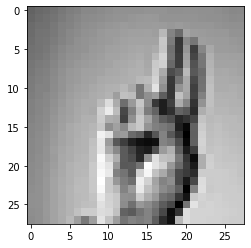

In [63]:
# example train data
plt.imshow(np.reshape(x_train[10], (28,28)), cmap='gray')

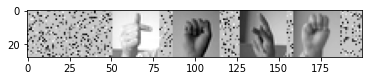

In [64]:
# example test data
plt.imshow(test_data[0], cmap='gray')

### initialize

In [65]:
# original code source: https://www.kaggle.com/databeru/sign-language-mnist-classifier-acc-99-78
#data augmentation
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            rotation_range=10,
                                                            zoom_range=0.10,
                                                            width_shift_range=0.1,
                                                            height_shift_range=0.1,
                                                            shear_range=0.1,
                                                            horizontal_flip=False,
                                                            fill_mode="nearest")


generator_2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            rotation_range=30,
                                                            zoom_range=0.20,
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            horizontal_flip=False,
                                                            fill_mode="nearest")

In [66]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
learning_rate_reduction_2 = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.00001)

epoch = [25, 40]


### Model settings 1 (model 1)

In [67]:
# Data augmentation
X_train_flow_1 = generator.flow(x_train, y_train, batch_size=32)
X_val_flow_1 = generator.flow(x_val, y_val, batch_size=32)

In [68]:
# initialising the input shape
# design the CNN Sequential model
model_1 = Sequential([
    Conv2D(filters=9, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=25, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=49, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),


    Flatten(),

    Dense(24*8, activation='relu'),
    Dense(24*4, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [69]:
# compiling the model
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [70]:
# original code source: https://www.kaggle.com/databeru/sign-language-mnist-classifier-acc-99-78
history_1 = model_1.fit(X_train_flow_1, 
                        validation_data=X_val_flow_1, 
                        epochs=epoch[0],
                        callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=3,
                                restore_best_weights=True), 
                                learning_rate_reduction
                    ])

Epoch 1/25
687/687 [==============================] - 12s 17ms/step - loss: 2.2311 - accuracy: 0.2923 - val_loss: 1.1475 - val_accuracy: 0.6303
Epoch 2/25
687/687 [==============================] - 11s 17ms/step - loss: 1.0251 - accuracy: 0.6512 - val_loss: 0.5752 - val_accuracy: 0.8124
Epoch 3/25
687/687 [==============================] - 12s 17ms/step - loss: 0.6533 - accuracy: 0.7724 - val_loss: 0.4115 - val_accuracy: 0.8590
Epoch 4/25
687/687 [==============================] - 12s 17ms/step - loss: 0.4844 - accuracy: 0.8312 - val_loss: 0.2613 - val_accuracy: 0.9086
Epoch 5/25
687/687 [==============================] - 12s 17ms/step - loss: 0.3585 - accuracy: 0.8735 - val_loss: 0.2271 - val_accuracy: 0.9231
Epoch 6/25
687/687 [==============================] - 12s 17ms/step - loss: 0.2928 - accuracy: 0.8989 - val_loss: 0.1690 - val_accuracy: 0.9435
Epoch 7/25
687/687 [==============================] - 11s 17ms/step - loss: 0.2492 - accuracy: 0.9160 - val_loss: 0.1272 - val_accuracy:

### Model settings 2 (model 2, epoch)

In [88]:
# Data augmentation
X_train_flow_2 = generator.flow(x_train, y_train, batch_size=32)
X_val_flow_2 = generator.flow(x_val, y_val, batch_size=32)

In [89]:
# original code source: https://www.kaggle.com/databeru/sign-language-mnist-classifier-acc-99-78
# initialising the input shape
# design the CNN Sequential model
model_2 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(2,2, padding='same'),

    Flatten(),

    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [90]:
# compiling the model
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [91]:
history_2 = model_2.fit(X_train_flow_2, 
                        validation_data=X_val_flow_2, 
                        epochs=epoch[0],
                        callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=3,
                                restore_best_weights=True), 
                                learning_rate_reduction
                    ])

Epoch 1/25
687/687 [==============================] - 63s 91ms/step - loss: 1.5991 - accuracy: 0.4786 - val_loss: 0.4691 - val_accuracy: 0.8223
Epoch 2/25
687/687 [==============================] - 76s 110ms/step - loss: 0.3218 - accuracy: 0.8878 - val_loss: 0.1100 - val_accuracy: 0.9614
Epoch 3/25
687/687 [==============================] - 75s 109ms/step - loss: 0.1434 - accuracy: 0.9530 - val_loss: 0.0780 - val_accuracy: 0.9732
Epoch 4/25
687/687 [==============================] - 75s 109ms/step - loss: 0.0808 - accuracy: 0.9747 - val_loss: 0.0406 - val_accuracy: 0.9869
Epoch 5/25
687/687 [==============================] - 75s 110ms/step - loss: 0.0597 - accuracy: 0.9801 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 6/25
687/687 [==============================] - 76s 110ms/step - loss: 0.0531 - accuracy: 0.9828 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 7/25
687/687 [==============================] - 76s 110ms/step - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0204 - val_acc

### Model settings 3 (model 1,  learning rate reduction factor, epoch)

In [75]:
# Data augmentation
X_train_flow_3 = generator.flow(x_train, y_train, batch_size=32)
X_val_flow_3 = generator.flow(x_val, y_val, batch_size=32)

In [76]:
# initialising the input shape
# design the CNN Sequential model
model_3 = Sequential([
    Conv2D(filters=9, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=25, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=49, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),


    Flatten(),

    Dense(24*8, activation='relu'),
    Dense(24*4, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [78]:
# compiling the model
model_3.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [79]:

history_3 = model_3.fit(X_train_flow_3, 
                        validation_data=X_val_flow_3, 
                        epochs=epoch[1],
                        callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=3,
                                restore_best_weights=True), 
                                learning_rate_reduction_2
                    ])

Epoch 1/40
687/687 [==============================] - 12s 17ms/step - loss: 2.2669 - accuracy: 0.2803 - val_loss: 1.2394 - val_accuracy: 0.6019
Epoch 2/40
687/687 [==============================] - 12s 17ms/step - loss: 1.1703 - accuracy: 0.5982 - val_loss: 0.7540 - val_accuracy: 0.7363
Epoch 3/40
687/687 [==============================] - 11s 17ms/step - loss: 0.7706 - accuracy: 0.7327 - val_loss: 0.4575 - val_accuracy: 0.8430
Epoch 4/40
687/687 [==============================] - 12s 17ms/step - loss: 0.5600 - accuracy: 0.8046 - val_loss: 0.3283 - val_accuracy: 0.8887
Epoch 5/40
687/687 [==============================] - 11s 17ms/step - loss: 0.4229 - accuracy: 0.8546 - val_loss: 0.2962 - val_accuracy: 0.8958
Epoch 6/40
687/687 [==============================] - 12s 17ms/step - loss: 0.3385 - accuracy: 0.8819 - val_loss: 0.1898 - val_accuracy: 0.9343
Epoch 7/40
687/687 [==============================] - 12s 18ms/step - loss: 0.2717 - accuracy: 0.9087 - val_loss: 0.1298 - val_accuracy:

### Model settings 4 (model 1, generator_2)

In [80]:
# Data augmentation
X_train_flow_4 = generator_2.flow(x_train, y_train, batch_size=32)
X_val_flow_4 = generator_2.flow(x_val, y_val, batch_size=32)

In [81]:
# initialising the input shape
# design the CNN Sequential model
model_4 = Sequential([
    Conv2D(filters=9, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=25, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=49, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),


    Flatten(),

    Dense(24*8, activation='relu'),
    Dense(24*4, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [82]:
# compiling the model
model_4.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [83]:
history_4 = model_4.fit(X_train_flow_4, 
                        validation_data=X_val_flow_4, 
                        epochs=epoch[0],
                        callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=3,
                                restore_best_weights=True), 
                                learning_rate_reduction
                    ])

Epoch 1/25
687/687 [==============================] - 12s 17ms/step - loss: 2.7540 - accuracy: 0.1483 - val_loss: 2.0424 - val_accuracy: 0.3495
Epoch 2/25
687/687 [==============================] - 12s 17ms/step - loss: 1.9037 - accuracy: 0.3639 - val_loss: 1.4893 - val_accuracy: 0.5015
Epoch 3/25
687/687 [==============================] - 12s 17ms/step - loss: 1.4824 - accuracy: 0.4963 - val_loss: 1.1723 - val_accuracy: 0.6001
Epoch 4/25
687/687 [==============================] - 12s 17ms/step - loss: 1.2461 - accuracy: 0.5703 - val_loss: 1.0025 - val_accuracy: 0.6531
Epoch 5/25
687/687 [==============================] - 11s 16ms/step - loss: 1.0756 - accuracy: 0.6244 - val_loss: 0.8812 - val_accuracy: 0.6888
Epoch 6/25
687/687 [==============================] - 11s 16ms/step - loss: 0.9687 - accuracy: 0.6614 - val_loss: 0.7401 - val_accuracy: 0.7416
Epoch 7/25
687/687 [==============================] - 11s 16ms/step - loss: 0.8628 - accuracy: 0.6997 - val_loss: 0.7131 - val_accuracy:

### Model settings 5 (model 2, learning rate reduction, epoch)

In [84]:
X_train_flow_5 = generator.flow(x_train, y_train, batch_size=32)
X_val_flow_5 = generator.flow(x_val, y_val, batch_size=32)

In [85]:
# initialising the input shape
# design the CNN Sequential model
model_5 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(2,2, padding='same'),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu'), 
    MaxPool2D(2,2, padding='same'),

    Flatten(),

    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

In [86]:
# compiling the model
model_5.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [87]:
history_5 = model_5.fit(X_train_flow_5, 
                        validation_data=X_val_flow_5, 
                        epochs=epoch[1],
                        callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=3,
                                restore_best_weights=True), 
                                learning_rate_reduction_2
                    ])

Epoch 1/40
687/687 [==============================] - 62s 89ms/step - loss: 1.7330 - accuracy: 0.4389 - val_loss: 0.4838 - val_accuracy: 0.8294
Epoch 2/40
687/687 [==============================] - 74s 107ms/step - loss: 0.3597 - accuracy: 0.8755 - val_loss: 0.1165 - val_accuracy: 0.9632
Epoch 3/40
687/687 [==============================] - 78s 114ms/step - loss: 0.1493 - accuracy: 0.9524 - val_loss: 0.0722 - val_accuracy: 0.9738
Epoch 4/40
687/687 [==============================] - 77s 112ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0704 - val_accuracy: 0.9743
Epoch 5/40
687/687 [==============================] - 76s 111ms/step - loss: 0.0614 - accuracy: 0.9805 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 6/40
687/687 [==============================] - 80s 117ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0102 - val_accuracy: 0.9975
Epoch 7/40
687/687 [==============================] - 75s 110ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0340 - val_acc

### Crop test images

#### Looking for the best threshold (best thres = 9)

In [3]:
# extract the noise columns defined as having at least thres(9 as default) pixels which are equal to 200 
# return the list of noise column indices
def get_columns(pic, pixel = 200, thres = 9):
    return [col for col in range(200) if np.sum(pic[:,col] == pixel) >= thres]

# total number of images
amount = test_data.shape[0]

# iterate through the thres to see which one works the best 
for th in [8,9,10,11,12]:
    
    # calculate the number of noisy columns in each image,and the remainder of (num_noisy_col / 28)
    tc = [(200-len(get_columns(test_data[i,:,:], thres = th)))%28 for i in range(amount)]
    tc = np.array(tc)
    
    # iterate through the index and remainders of each col, and compare the num of (remainder != 0) between thres
    l = len([(i,v) for i, v in enumerate(tc) if v != 0])
    print("thres:{} has {}".format(th,l))

thres:8 has 40
thres:9 has 7
thres:10 has 30
thres:11 has 130
thres:12 has 595


In [4]:
# set thres = 9, print the indices, remainder of these bad pictures (with remainder !=0 )
tc = [(200-len(get_columns(test_data[i,:,:], thres = 9)))%28 for i in range(10000)]
tc = np.array(tc)
[(i,v) for i, v in enumerate(tc) if v != 0]

[(1332, 1),
 (2045, 1),
 (4076, 1),
 (6802, 27),
 (7770, 27),
 (7953, 27),
 (9604, 27)]

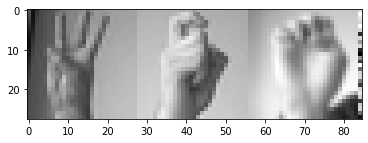

In [10]:
# drop the col and check the output image
def drop_col(data, col_list):
    return np.delete(data, col_list, axis = 1) 

def show_pic(i):
    c =  get_columns(test_data[i,:,:], thres = 9)
    pn = drop_col(test_data[i,:,:], c)
    plt.imshow(pn, cmap='gray')
    
show_pic(1332)

#### apply the threshold on the entire test set

In [92]:
# crop images
def get_columns(pic, pixel = 200, thres = 9):
    return [col for col in range(200) if np.sum(pic[:,col] == pixel) >= thres]

def drop_col(data, col_list):
    data = np.delete(data, col_list, axis = 1)
    return data

def data_trim(data):
    data_tr = [0] * data.shape[0]
    for i in range(data.shape[0]):
        c =  get_columns(data[i,:,:], thres = 9)
        pn = drop_col(data[i,:,:], c)
        data_tr[i] = pn
    return data_tr

In [93]:
# crop test_data and assign to variable 'new_data'
new_data = (data_trim(test_data))

### Predictions

In [94]:
def prediction(model, data=new_data):
    predictions = {}
    for img in range(len(new_data)):
        #print(img)
        temp = np.array(new_data[img])
        #print(temp.shape)

        # split img and save each one individually
        num_split = int(temp.shape[1] / 28)
        if temp.shape[1] % 28 == 0:
            signs = list(np.hsplit(temp,num_split))
        else:
            signs = []
            start = 0
            end = 28
            for i in range(num_split):
                #print('emp[:, {}:{}]'.format(start, end))
                signs.append(temp[:, start:end])            
                start = end
                end = (i+2) * 28 

        # reshape signs
        signs = np.reshape(np.array(signs), (num_split, 28, 28, 1))
        signs /= 255
        predictions[img] = model.predict(signs)
    return predictions

# Transform predictions into 1-D array with label number
def pred_label(predictions):
    pred_label = {}
    for i in range(len(predictions)):   
        temp = []
        temp = np.argmax(predictions[i], axis=1)
        pred_label[i] = temp
    return pred_label

# +1 for pred_label > 8
def label_modify(pred_label):
    for value in pred_label.values():
        for i in range(value.size):
            if value[i] > 8:
                value[i] += 1

In [95]:
# predicted probs
pred_1 = prediction(model_1)
pred_2 = prediction(model_2)
pred_3 = prediction(model_3)
pred_4 = prediction(model_4)
pred_5 = prediction(model_5)

In [100]:
# predicted labels
pred_label_1 = pred_label(pred_1)
pred_label_2 = pred_label(pred_2)
pred_label_3 = pred_label(pred_3)
pred_label_4 = pred_label(pred_4)
pred_label_5 = pred_label(pred_5)

In [113]:
# check before modify
pred_label_5[9999]

array([22, 17,  7], dtype=int64)

In [116]:
# label modification
label_modify(pred_label_1)
label_modify(pred_label_2)
label_modify(pred_label_3)
label_modify(pred_label_4)
label_modify(pred_label_5)

In [117]:
# check after modify
pred_label_5[9999]

array([23, 18,  7], dtype=int64)

In [118]:
all_preds = [pred_label_1, pred_label_2, pred_label_3, pred_label_4, pred_label_5]

### Manual compare true_labels and pred_labels

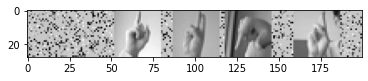

In [133]:
plt.imshow(test_data[2], cmap='gray')

In [132]:
pred_label_4[2]

array([ 3, 20, 16,  3], dtype=int64)

### Save to csv file

In [119]:
test_data.shape

(10000, 28, 200)

In [124]:
# convert pred_label from int to string
pred_str = np.zeros((test_data.shape[0], len(all_preds)), dtype='object')
for pred in range(len(all_preds)):
    for i, v in all_preds[pred].items():
        #print(i, v)
        temp = ''
        for value in v:
            temp += '{0:0=2d}'.format(value)
        pred_str[i, pred] = temp

In [148]:
# convertion check
pred_str[65,:]

array(['020604', '020604', '020604', '020604', '020604'], dtype=object)

In [142]:
# convert to pd
df = pd.DataFrame(pred_str, columns=['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'], dtype=str)

In [146]:
# data inspection
df.head(10)

,pred_1,pred_2,pred_3,pred_4,pred_5
0,19181012,19181012,19181012,19181012,19181012
1,2423142413,2423142413,2423142413,2423142413,2423142413
2,03201617,03201617,03201617,03201603,03201617
3,2203180819,2203180819,2203180819,2203180819,2203180819
4,210214,210214,210214,210214,210214
5,2000070717,2000070717,2000070717,2000070717,2000070717
6,1215232005,1215232005,1215232005,1215232005,1215232005
7,00192208,00192208,00192208,00192208,00192208
8,15080615,15080615,15080615,15080615,15080615
9,0303112203,0303112203,0303112203,0303112203,0303112203


In [144]:
# save to dir
df.to_csv('Task2_pred.csv', index=False, header=False)